In [385]:
# Import necessary modules,
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import validation_curve

In [386]:
monk1_train = pd.read_csv('data/monks-1.train',header=None,sep=" ")
monk1_test = pd.read_csv('data/monks-1.test',header=None,sep=" ")

In [387]:
monk1_train.drop(0,axis=1,inplace=True)
monk1_train.drop(8,axis=1,inplace=True)

monk1_test.drop(0,axis=1,inplace=True)
monk1_test.drop(8,axis=1,inplace=True)

In [388]:
#monk1_train

In [389]:
#monk1_test

In [390]:
columns = ['class', 'a1', 'a2', 'a3', 'a4', 'a4', 'a6']
monk1_train.columns = columns
monk1_test.columns = columns

In [391]:
#monk1_test

In [392]:
ytr = monk1_train.iloc[:,0]
xtr = monk1_train.iloc[:,1:]


xts = monk1_test.iloc[:,1:]
yts = monk1_test.iloc[:,0]

In [393]:
#yts

In [394]:
#ytr

In [395]:
scaler = StandardScaler()
xtr = scaler.fit_transform(xtr)
xts = scaler.fit_transform(xts)

In [396]:
type(xtr)

numpy.ndarray

# Grid search & CV for best parameters

In [397]:
model = KNeighborsClassifier()

k_range = [15,18,20]
algos = ['auto','ball_tree','kd_tree','brute']
metrics = ['euclidean','manhattan','cityblock']
p=[1,2]
weights=['uniform','distance']

param_grid = dict(n_neighbors=k_range,algorithm=algos,metric=metrics,p=p,weights=weights)
  
# defining parameter range
grid = GridSearchCV(model, param_grid, cv=60, scoring='accuracy', return_train_score=True,verbose=1,refit=True)
  
# fitting the model for grid search
grid_search=grid.fit(xtr, ytr)

Fitting 60 folds for each of 144 candidates, totalling 8640 fits


In [398]:
print(grid_search.best_params_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 18, 'p': 1, 'weights': 'uniform'}


In [399]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 83.33%


# Check on unseen data

In [400]:
y_pred=grid_search.predict(xts) 

test_accuracy=accuracy_score(yts,y_pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 71.53%


/Users/dylan/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


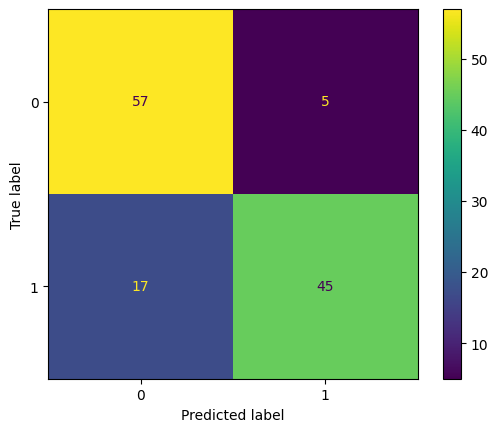

In [401]:
plot_confusion_matrix(grid,xtr, ytr,values_format='d' )

# Accuracy on TR and VL

# Overfitting

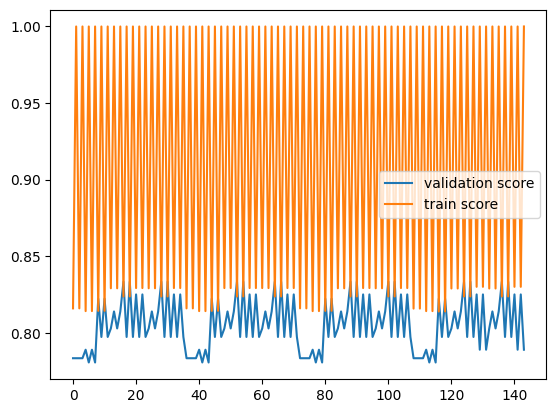

In [402]:
validation_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score'] 
plt.plot(validation_scores, label='validation score')
plt.plot(train_scores, label='train score')
plt.legend(loc='best')
plt.show()

# Validation curve

In [430]:
param_range = [45,50]
train_scores, validation_scores = validation_curve(model, xtr, ytr, param_name="n_neighbors", cv=60, param_range=param_range)

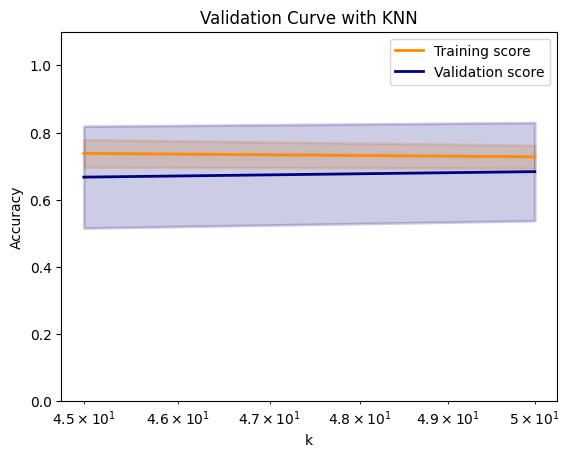

In [431]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.title("Validation Curve with KNN")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, validation_scores_mean, label="Validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    validation_scores_mean - validation_scores_std,
    validation_scores_mean + validation_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

# Best trade off is on 45<k<50, before 45 is overfitting, after 50 underfitting

# Grid search with new information from the val_curve

In [405]:
new_model = KNeighborsClassifier()

k_range = [x for x in range(46,50)]
algos = ['auto','ball_tree','kd_tree','brute']
metrics = ['euclidean','manhattan','cityblock']
p=[1,2]
weights=['uniform','distance']

param_grid = dict(n_neighbors=k_range,algorithm=algos,metric=metrics,p=p,weights=weights)
  
# defining parameter range
new_grid = GridSearchCV(new_model, param_grid, cv=60, scoring='accuracy', return_train_score=True,verbose=1,refit=True)
  
# fitting the model for grid search
new_grid_search=new_grid.fit(xtr, ytr)

Fitting 60 folds for each of 192 candidates, totalling 11520 fits


In [406]:
print(new_grid_search.best_params_)

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 49, 'p': 1, 'weights': 'distance'}


In [407]:
accuracy = new_grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 78.33%


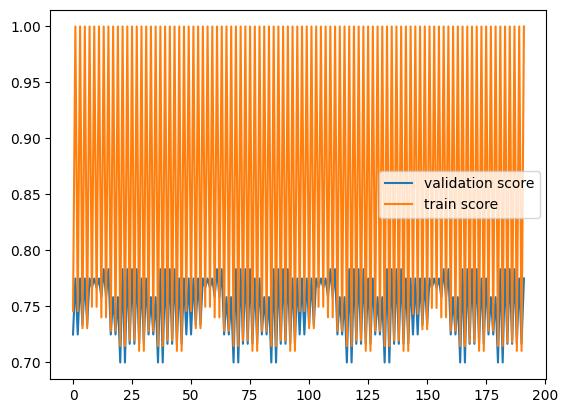

In [414]:
validation_scores = new_grid_search.cv_results_['mean_test_score']
train_scores = new_grid_search.cv_results_['mean_train_score'] 
plt.plot(validation_scores, label='validation score')
plt.plot(train_scores, label='train score')
plt.legend(loc='best')
plt.show()

# Check on unseen data

In [408]:
y_pred=new_grid_search.predict(xts) 

test_accuracy=accuracy_score(yts,y_pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 74.77%


# With one-hot encoding

In [409]:
monk1_train = pd.read_csv('data/monks-1.train',header=None,sep=" ")
monk1_test = pd.read_csv('data/monks-1.test',header=None,sep=" ")


columns = ['class', 'a1', 'a2', 'a3', 'a4', 'a4', 'a6', 'id']
train1 = monk1_train.drop(columns=0)
train1.columns = columns
test1 = monk1_test.drop(columns=0)
test1.columns = columns

X_train1 = train1.copy()
y_train1 = X_train1['class']
X_train1 = X_train1.drop(columns='id')
X_train1 = X_train1.drop(columns='class')
X_train1 = X_train1.values

X_test1 = test1.copy()
y_test1 = X_test1['class']
X_test1 = X_test1.drop(columns='id')
X_test1 = X_test1.drop(columns='class')
X_test1 = X_test1.values

encoder = OneHotEncoder()
        
encoder.fit(X_train1)
X_train1 = encoder.transform(X_train1).toarray()
        
encoder.fit(X_test1)
X_test1 = encoder.transform(X_test1).toarray()

# GridSearch and KFold val 

##### A higher k (number of folds) means that each model is trained on a larger training set and tested on a smaller test fold. In theory, this should lead to a lower prediction error as the models see more of the available data

##### A lower k means that the model is trained on a smaller training set and tested on a larger test fold. Here, the potential for the data distribution in the test fold to differ from the training set is bigger, and we should thus expect a higher prediction error on average

In [410]:
knn = KNeighborsClassifier()

k_range = [3,5,7,9,15,18,20]
algos = ['auto','ball_tree','kd_tree','brute']
metrics = ['euclidean','manhattan','cityblock']
p=[1,2]
weights=['uniform','distance']

param_grid = dict(n_neighbors=k_range,algorithm=algos,metric=metrics,p=p,weights=weights)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=60, scoring='accuracy', return_train_score=True,verbose=1,refit=True)
  
# fitting the model for grid search
grid_search=grid.fit(X_train1, y_train1)

Fitting 60 folds for each of 336 candidates, totalling 20160 fits


In [411]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 18, 'p': 1, 'weights': 'distance'}
Accuracy for our training dataset with tuning is : 84.17%


# Accuracy on TR and VL

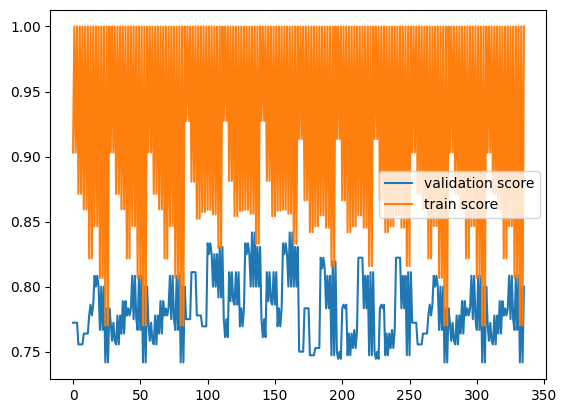

In [412]:
validation_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score'] 
plt.plot(validation_scores, label='validation score')
plt.plot(train_scores, label='train score')
plt.legend(loc='best')
plt.show()

In [413]:
y_pred=grid_search.predict(X_test1) 

test_accuracy=accuracy_score(y_test1,y_pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 83.33%
